In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("/Users/icg/Downloads/customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.dtypes
df.shape

(7043, 20)

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
#cuz totalcharges in string form n should be in numeric form
#errors=coerce ignores spcaes and puts na in place of spaces 
#isnull will give rows with null values of totalcharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df=df[df.TotalCharges!=' ']
df.shape 

(7032, 20)

In [8]:
df.TotalCharges=pd.to_numeric(df.TotalCharges) #changes datatype from object to float

In [9]:
tenure_YES=df[df.Churn=='Yes'].tenure
tenure_NO=df[df.Churn=='No'].tenure

Text(0.5, 1.0, 'Customer Churn Visualisation ')

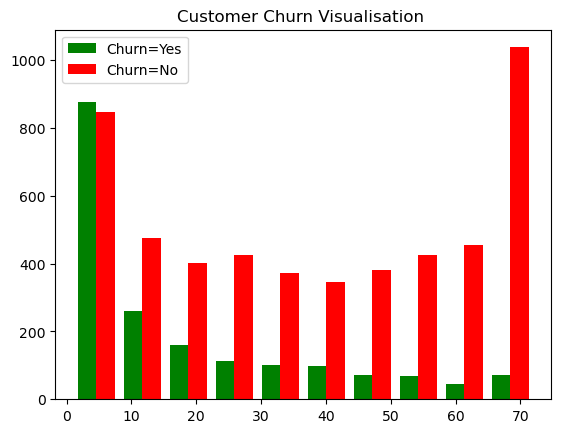

In [10]:
plt.hist([tenure_YES,tenure_NO],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title("Customer Churn Visualisation ")

Text(0.5, 1.0, 'Customer Churn Visualisation ')

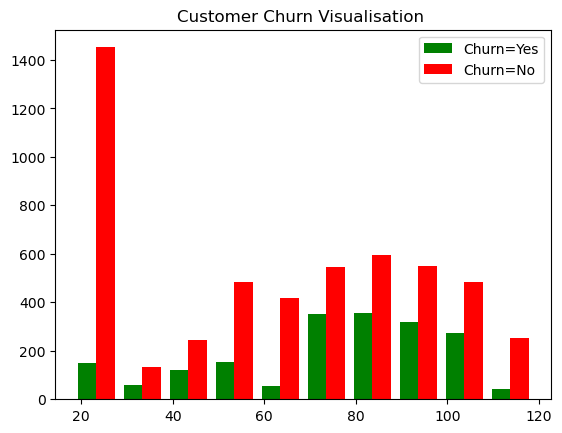

In [11]:
mc_YES=df[df.Churn=='Yes'].MonthlyCharges
mc_NO=df[df.Churn=='No'].MonthlyCharges
plt.hist([mc_YES,mc_NO],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title("Customer Churn Visualisation ")

In [12]:
def unique_vals(df):
    for i in df:
        if df[i].dtypes=='object':
            print(f'{i} : {df[i].unique()}')

In [13]:
df=df.replace('No internet service','No')
df=df.replace('No phone service','No')

In [14]:
yesno_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
           'Churn']
for i in yesno_cols:
    df[i]=df[i].replace({'Yes':1,'No' :0})

/var/folders/d9/bnn_hv192bzfnk9vk63rpwg40000gn/T/ipykernel_9609/669218766.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].replace({'Yes':1,'No' :0})


In [15]:
df['gender']=df['gender'].replace({'Female': 1, 'Male': 0})

/var/folders/d9/bnn_hv192bzfnk9vk63rpwg40000gn/T/ipykernel_9609/797923034.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'Female': 1, 'Male': 0})


In [16]:
unique_vals(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [34]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
yesno_cols=['InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for i in yesno_cols:
    df1[i]=df1[i].replace({True:1, False:0})
#during train n split there was a problem of convert array cuz the above columns were in bool form and not in int

/var/folders/d9/bnn_hv192bzfnk9vk63rpwg40000gn/T/ipykernel_9609/3726507970.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[i]=df1[i].replace({True:1, False:0})


In [43]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [44]:
#scaling the tenure monthly n totalcharges to bring them in range btw [0,1]
scaling_col=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df1[scaling_col]=scaler.fit_transform(df1[scaling_col])


In [45]:
X=df1.drop('Churn',axis='columns')
Y=df1['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [46]:
import tensorflow as tf
from tensorflow import keras


In [47]:
X_train.shape

(5625, 26)

In [51]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4956 - accuracy: 0.7552
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7961
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8002
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8021
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8039
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8103
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8057
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8107
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8071
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8094

In [53]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 8ms/step - loss: 0.4880 - accuracy: 0.7711


[0.4879685342311859, 0.7711442708969116]

In [55]:
yp=model.predict(X_test)
yp[:5]
#these are values predicted after training our model, we will compare it will y_predicted
#we will convert these values to either 0 or 1 since the target is churn or not churn to do 
#that we consider a threshold value above which it is 1 and below its 0 

44/44 [==============================] - 0s 2ms/step


array([[0.4422621 ],
       [0.66249996],
       [0.0051268 ],
       [0.8921285 ],
       [0.33892158]], dtype=float32)

In [57]:
Y_pred=[]
for i in yp:
    if i > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
Y_pred[:5]

[0, 1, 0, 1, 0]

In [60]:
#performance of the model
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       999
           1       0.63      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

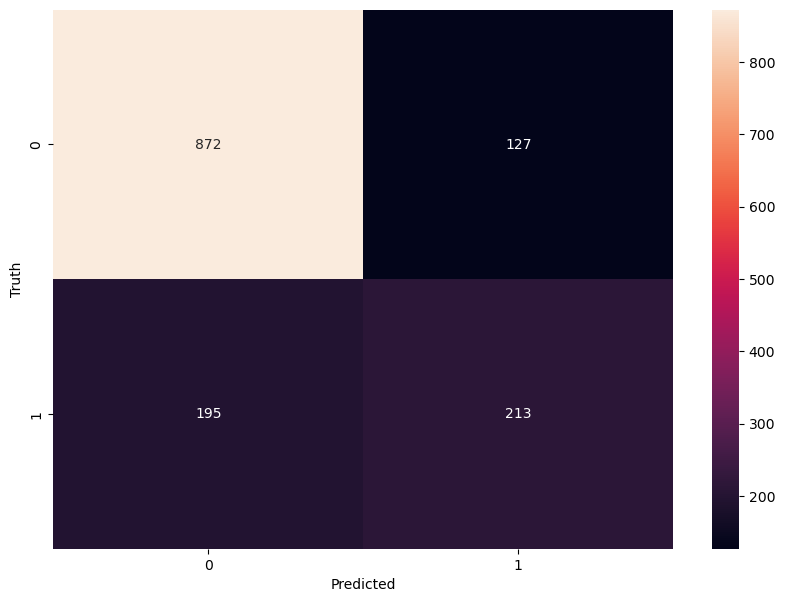

In [64]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')